# Elite Sports Cars Data

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
%matplotlib inline
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [2]:
df = pd.read_csv("data/Elite Sports Cars in Data.csv")
df.head()

,Brand,Model,Year,Country,Condition,Engine_Size,Horsepower,Torque,Weight,Top_Speed,Acceleration_0_100,Fuel_Type,Drivetrain,Transmission,Fuel_Efficiency,CO2_Emissions,Price,Mileage,Popularity,Safety_Rating,Number_of_Owners,Market_Demand,Insurance_Cost,Production_Units,Log_Price,Log_Mileage,Modification
0,Nissan,720S,2006,Asia,used,3.7,420,705,1785,238,5.7,Diesel,RWD,Automatic,10.5,307,81580,96664,Low,2,4,Medium,13410,5000,11.309352,11.479007,V-Spec
1,McLaren,911 Turbo S,2009,Europe,new,5.3,1104,766,992,386,4.6,Electric,RWD,DCT,9.4,113,308455,159630,High,2,2,Medium,10795,1000,12.639334,11.980620,NaN
2,Chevrolet,M4 Competition,2009,USA,new,5.5,153,1573,2022,397,6.7,Diesel,FWD,Automatic,5.0,321,420374,111496,High,1,2,Low,1716,20000,12.948902,11.621753,NaN
3,Bugatti,Chiron,1982,Asia,used,5.4,544,1009,1091,151,2.7,Petrol,RWD,CVT,7.3,343,123690,217228,High,2,4,Medium,11618,20000,11.725542,12.288707,NaN
4,Nissan,Chiron,2022,Europe,new,2.4,980,693,1232,385,3.0,Petrol,AWD,DCT,6.0,246,75303,150318,Low,3,2,Medium,11324,100000,11.229289,11.920515,NaN


## EDA

In [3]:
df.dtypes

Brand                  object
Model                  object
Year                    int64
Country                object
Condition              object
Engine_Size           float64
Horsepower              int64
Torque                  int64
Weight                  int64
Top_Speed               int64
Acceleration_0_100    float64
Fuel_Type              object
Drivetrain             object
Transmission           object
Fuel_Efficiency       float64
CO2_Emissions           int64
Price                   int64
Mileage                 int64
Popularity             object
Safety_Rating           int64
Number_of_Owners        int64
Market_Demand          object
Insurance_Cost          int64
Production_Units        int64
Log_Price             float64
Log_Mileage           float64
Modification           object
dtype: object

In [4]:
df.shape

(5000, 27)

In [5]:
df.describe(include="all")

,Brand,Model,Year,Country,Condition,Engine_Size,Horsepower,Torque,Weight,Top_Speed,Acceleration_0_100,Fuel_Type,Drivetrain,Transmission,Fuel_Efficiency,CO2_Emissions,Price,Mileage,Popularity,Safety_Rating,Number_of_Owners,Market_Demand,Insurance_Cost,Production_Units,Log_Price,Log_Mileage,Modification
count,5000,5000,5000.000000,5000,5000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000,5000,5000,5000.000000,5000.000000,5000.000000,5000.000000,5000,5000.000000,5000.000000,5000,5000.000000,5000.000000,5000.000000,5000.000000,1977
unique,10,10,NaN,3,4,NaN,NaN,NaN,NaN,NaN,NaN,3,3,4,NaN,NaN,NaN,NaN,3,NaN,NaN,3,NaN,NaN,NaN,NaN,8
top,Ferrari,M4 Competition,NaN,Asia,new,NaN,NaN,NaN,NaN,NaN,NaN,Petrol,RWD,CVT,NaN,NaN,NaN,NaN,Low,NaN,NaN,Low,NaN,NaN,NaN,NaN,RS
freq,533,538,NaN,1677,2559,NaN,NaN,NaN,NaN,NaN,NaN,1688,1681,1267,NaN,NaN,NaN,NaN,2001,NaN,NaN,1704,NaN,NaN,NaN,NaN,270
mean,NaN,NaN,2001.904800,NaN,NaN,4.828700,822.891600,938.800600,1689.724200,274.857000,4.517280,NaN,NaN,NaN,10.038340,272.695200,262067.329400,126487.020800,NaN,2.502200,2.479200,NaN,7749.857800,26496.010000,12.266985,11.449482,NaN
std,NaN,NaN,12.873697,NaN,NaN,1.858353,401.362549,472.954278,465.786421,72.062214,1.448473,NaN,NaN,NaN,2.881613,100.154245,137678.803906,72773.504601,NaN,1.119038,1.114368,NaN,4177.751738,36767.027776,0.741124,0.973881,NaN
min,NaN,NaN,1980.000000,NaN,NaN,1.600000,130.000000,120.000000,900.000000,150.000000,2.000000,NaN,NaN,NaN,5.000000,100.000000,20014.000000,47.000000,NaN,1.000000,1.000000,NaN,501.000000,50.000000,9.904237,3.871201,NaN
25%,NaN,NaN,1991.000000,NaN,NaN,3.200000,472.000000,522.000000,1286.000000,214.000000,3.300000,NaN,NaN,NaN,7.600000,186.000000,143710.750000,63809.750000,NaN,1.000000,1.000000,NaN,4106.750000,1000.000000,11.875565,11.063677,NaN
50%,NaN,NaN,2002.000000,NaN,NaN,4.800000,815.500000,948.000000,1684.000000,275.000000,4.500000,NaN,NaN,NaN,10.000000,273.000000,265213.500000,126762.500000,NaN,3.000000,2.000000,NaN,7697.500000,5000.000000,12.488294,11.750078,NaN
75%,NaN,NaN,2013.000000,NaN,NaN,6.500000,1176.000000,1345.000000,2101.000000,337.000000,5.800000,NaN,NaN,NaN,12.600000,357.000000,380923.500000,190287.500000,NaN,3.000000,3.000000,NaN,11351.750000,20000.000000,12.850356,12.156297,NaN


In [6]:
for c in df.columns:
    print(f"#### Column {c}")

#### Column Brand
#### Column Model
#### Column Year
#### Column Country
#### Column Condition
#### Column Engine_Size
#### Column Horsepower
#### Column Torque
#### Column Weight
#### Column Top_Speed
#### Column Acceleration_0_100
#### Column Fuel_Type
#### Column Drivetrain
#### Column Transmission
#### Column Fuel_Efficiency
#### Column CO2_Emissions
#### Column Price
#### Column Mileage
#### Column Popularity
#### Column Safety_Rating
#### Column Number_of_Owners
#### Column Market_Demand
#### Column Insurance_Cost
#### Column Production_Units
#### Column Log_Price
#### Column Log_Mileage
#### Column Modification


### Columns Analysis

#### Column Brand


In [7]:
df["Brand"].isnull().sum()

np.int64(0)

In [8]:
df["Brand"].unique()

array(['Nissan', 'McLaren', 'Chevrolet', 'Bugatti', 'BMW', 'Porsche',
       'Aston Martin', 'Lamborghini', 'Ferrari', 'Ford'], dtype=object)

#### Column Model


In [9]:
df["Model"].isnull().sum()

np.int64(0)

In [10]:
df["Model"].unique()

array(['720S', '911 Turbo S', 'M4 Competition', 'Chiron', 'GT-R',
       'Mustang GT', 'DBS', 'Huracan', 'Corvette Z06', '488 GTB'],
      dtype=object)

#### Column Year


In [11]:
df["Year"].isnull().sum()

np.int64(0)

In [12]:
df["Year"].unique()

array([2006, 2009, 1982, 2022, 1986, 1988, 2020, 2021, 1992, 1994, 1984,
       2008, 2014, 1987, 2011, 1999, 1989, 2010, 2001, 2000, 1991, 1990,
       1981, 2013, 1995, 1983, 2002, 2004, 1997, 1996, 2005, 2024, 2003,
       1993, 2015, 2023, 1985, 2016, 2017, 1980, 2012, 1998, 2007, 2018,
       2019])

#### Column Country


In [13]:
df["Country"].isnull().sum()

np.int64(0)

In [14]:
df["Country"].unique()

array(['Asia', 'Europe', 'USA'], dtype=object)


#### Column Condition


In [15]:
df["Condition"].isnull().sum()

np.int64(0)

In [16]:
df["Condition"].unique()

array(['used', 'new', 'salvage', 'restored'], dtype=object)

#### Column Engine_Size


In [17]:
df["Engine_Size"].isnull().sum()

np.int64(0)

In [18]:
df["Engine_Size"].unique()

array([3.7, 5.3, 5.5, 5.4, 2.4, 4.2, 7.4, 6.5, 6.1, 2.3, 2.1, 7. , 4.3,
       4.5, 5.6, 2.7, 3. , 1.6, 4.7, 7.7, 6.2, 2.6, 4.8, 7.5, 3.2, 6.9,
       3.6, 3.3, 1.9, 5.8, 6.7, 7.3, 2.8, 4.9, 2.5, 6.3, 7.8, 4.1, 3.8,
       7.9, 2.2, 3.4, 4.4, 2. , 6.8, 6. , 2.9, 4. , 3.1, 5.1, 3.9, 7.1,
       5. , 6.4, 3.5, 5.9, 8. , 5.7, 1.8, 5.2, 6.6, 7.2, 4.6, 1.7, 7.6])

#### Column Horsepower


In [19]:
df["Horsepower"].isnull().sum()

np.int64(0)

In [20]:
df["Horsepower"].unique()

array([ 420, 1104,  153, ...,  351,  214,  200])

#### Column Torque


In [21]:
df["Torque"].isnull().sum()

np.int64(0)

In [22]:
df["Torque"].unique()

array([ 705,  766, 1573, ..., 1447,  909,  983])

#### Column Weight


In [23]:
df["Weight"].isnull().sum()

np.int64(0)

In [24]:
df["Weight"].unique()

array([1785,  992, 2022, ...,  948,  915, 1973])

#### Column Top_Speed

In [25]:
df["Top_Speed"].isnull().sum()

np.int64(0)

In [26]:
df["Top_Speed"].unique()

array([238, 386, 397, 151, 385, 341, 245, 185, 382, 297, 332, 186, 383,
       251, 374, 329, 218, 219, 299, 362, 360, 256, 164, 247, 196, 348,
       358, 257, 201, 316, 368, 194, 301, 338, 260, 241, 271, 388, 214,
       330, 265, 298, 398, 276, 369, 216, 243, 278, 208, 264, 258, 167,
       262, 182, 292, 173, 209, 311, 239, 200, 317, 293, 253, 319, 165,
       282, 392, 283, 365, 179, 378, 309, 296, 305, 324, 221, 277, 345,
       334, 363, 207, 162, 176, 379, 270, 349, 289, 268, 337, 246, 223,
       322, 168, 240, 318, 180, 300, 227, 172, 190, 295, 313, 161, 224,
       346, 328, 234, 370, 220, 275, 315, 331, 153, 323, 212, 376, 351,
       395, 199, 350, 175, 306, 288, 373, 191, 284, 152, 340, 387, 169,
       371, 222, 272, 294, 228, 336, 290, 193, 396, 229, 375, 215, 357,
       266, 184, 302, 255, 384, 188, 263, 367, 326, 233, 225, 206, 177,
       381, 286, 389, 391, 320, 230, 314, 335, 248, 192, 344, 211, 307,
       187, 226, 249, 254, 197, 252, 279, 352, 269, 232, 380, 33

#### Column Acceleration_0_100


In [27]:
df["Acceleration_0_100"].isnull().sum()

np.int64(0)

In [28]:
df["Acceleration_0_100"].unique()

array([5.7, 4.6, 6.7, 2.7, 3. , 3.4, 2.1, 4.2, 4.4, 2.8, 6.4, 5.5, 6.5,
       2.2, 2.6, 4.9, 3.1, 6.2, 4.3, 4.8, 6. , 3.9, 5.3, 5. , 3.8, 3.7,
       4. , 5.8, 6.6, 2.3, 2.9, 5.9, 3.2, 2.4, 4.1, 3.3, 4.5, 5.2, 7. ,
       5.6, 3.5, 3.6, 6.3, 6.8, 2.5, 4.7, 5.1, 6.1, 6.9, 2. , 5.4])

#### Column Fuel_Type

In [29]:
df["Fuel_Type"].isnull().sum()

np.int64(0)

In [30]:
df["Fuel_Type"].unique()

array(['Diesel', 'Electric', 'Petrol'], dtype=object)

#### Column Drivetrain


In [31]:
df["Drivetrain"].isnull().sum()

np.int64(0)

In [32]:
df["Drivetrain"].unique()

array(['RWD', 'FWD', 'AWD'], dtype=object)

#### Column Transmission


In [33]:
df["Transmission"].isnull().sum()

np.int64(0)

In [34]:
df["Transmission"].unique()

array(['Automatic', 'DCT', 'CVT', 'Manual'], dtype=object)

#### Column Fuel_Efficiency


In [35]:
df["Fuel_Efficiency"].isnull().sum()

np.int64(0)

In [36]:
df["Fuel_Efficiency"].unique()

array([10.5,  9.4,  5. ,  7.3,  6. ,  8.2,  7.4, 12.6, 10. , 13.2, 11.4,
       11.6, 13.8, 13.5,  5.6, 10.8,  9.1, 11. , 13.6,  5.1, 13.7,  8.5,
        8.7,  5.4, 14.1, 13.9, 14.6, 12.7,  5.3, 14.3,  8.1,  6.3, 13.1,
       12.2,  7.7, 12.9, 10.6,  6.5, 14.4,  5.2,  9.3, 11.2,  8.8,  9.8,
        6.9, 14.7,  9.7, 11.9, 14.8,  6.8, 14. , 12.1, 10.3, 10.1, 10.2,
       12.5,  9.6,  5.8,  7. ,  5.5, 10.7,  9.9,  5.9,  6.6,  9.5,  8.9,
       12.4, 11.5, 13.4,  6.2, 14.2, 13.3, 12.3,  5.7,  6.1, 11.7, 14.5,
       15. ,  7.2,  8.4, 11.1,  9.2,  8. ,  8.6, 12.8,  6.7,  7.8,  9. ,
        7.9,  7.5, 12. ,  8.3, 13. , 11.8, 14.9, 11.3,  7.1, 10.4,  7.6,
        6.4, 10.9])

#### Column CO2_Emissions


In [37]:
df["CO2_Emissions"].isnull().sum()

np.int64(0)

In [38]:
df["CO2_Emissions"].unique()

array([307, 113, 321, 343, 246, 374, 176, 207, 429, 210, 224, 192, 336,
       347, 242, 308, 418, 122, 109, 355, 276, 353, 389, 194, 394, 179,
       317, 199, 380, 296, 346, 189, 352, 105, 118, 209, 186, 112, 441,
       294, 175, 328, 258, 432, 304, 425, 339, 413, 298, 237, 322, 423,
       437, 314, 107, 315, 383, 354, 422, 260, 213, 344, 435, 302, 316,
       244, 233, 273, 369, 264, 206, 431, 438, 440, 128, 319, 148, 101,
       297, 188, 310, 169, 292, 145, 162, 218, 325, 126, 290, 378, 327,
       323, 157, 400, 241, 249, 116, 137, 445, 386, 197, 446, 219, 309,
       312, 247, 195, 359, 172, 430, 381, 131, 127, 406, 267, 136, 333,
       278, 156, 332, 171, 102, 301, 306, 150, 337, 125, 391, 120, 439,
       159, 341, 177, 230, 313, 227, 280, 293, 417, 144, 282, 416, 104,
       253, 130, 436, 427, 124, 252, 240, 397, 211, 368, 271, 390, 402,
       334, 405, 395, 320, 388, 158, 350, 232, 342, 161, 203, 204, 190,
       263, 214, 185, 147, 287, 183, 345, 305, 215, 356, 114, 14

#### Column Price


In [39]:
df["Price"].isnull().sum()

np.int64(0)

In [40]:
df["Price"].unique()

array([ 81580, 308455, 420374, ..., 149052, 261268,  78239])

#### Column Mileage


In [41]:
df["Mileage"].isnull().sum()

np.int64(0)

In [42]:
df["Mileage"].unique()

array([ 96664, 159630, 111496, ...,  30314,  13144,  57970])

#### Column Popularity


In [43]:
df["Popularity"].isnull().sum()

np.int64(0)

In [44]:
df["Popularity"].unique()

array(['Low', 'High', 'Medium'], dtype=object)

#### Column Safety_Rating


In [45]:
df["Safety_Rating"].isnull().sum()

np.int64(0)

In [46]:
df["Safety_Rating"].unique()

array([2, 1, 3, 4])

#### Column Number_of_Owners


In [47]:
df["Number_of_Owners"].isnull().sum()

np.int64(0)

In [48]:
df["Number_of_Owners"].unique()

array([4, 2, 3, 1])

#### Column Market_Demand


In [49]:
df["Market_Demand"].isnull().sum()

np.int64(0)

In [50]:
df["Market_Demand"].unique()

array(['Medium', 'Low', 'High'], dtype=object)

#### Column Insurance_Cost


In [51]:
df["Insurance_Cost"].isnull().sum()

np.int64(0)

In [52]:
df["Insurance_Cost"].unique()

array([13410, 10795,  1716, ...,  1134,  7107,  1802])

#### Column Production_Units


In [53]:
df["Production_Units"].isnull().sum()

np.int64(0)

In [54]:
df["Production_Units"].unique()

array([  5000,   1000,  20000, 100000,    200,     50])

#### Column Log_Price


In [55]:
df["Log_Price"].isnull().sum()

np.int64(0)

In [56]:
df["Log_Price"].unique()

array([11.30935167, 12.63933449, 12.94890245, ..., 11.91205723,
       12.47330581, 11.2675363 ])

#### Column Log_Mileage


In [57]:
df["Log_Mileage"].isnull().sum()

np.int64(0)

In [58]:
df["Log_Mileage"].unique()

array([11.47900667, 11.98062018, 11.62175296, ..., 10.31939792,
        9.48379674, 10.96769816])

#### Column Modification

In [59]:
df["Modification"].isnull().sum()

np.int64(3023)

In [60]:
df["Modification"].unique()

array(['V-Spec', nan, 'Nismo', 'Supercharged', 'GT', 'Turbo',
       'Track Edition', 'Sport', 'RS'], dtype=object)

In [61]:
df["Modification"].replace(np.nan, "", regex=True, inplace=True)
df["Modification"].isnull().sum()

/var/folders/k5/31v5qtn906158jhjx2lmfxwr0000gn/T/ipykernel_48734/4173488794.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Modification"].replace(np.nan, "", regex=True, inplace=True)


np.int64(0)

In [62]:
df["Modification"].unique()

array(['V-Spec', '', 'Nismo', 'Supercharged', 'GT', 'Turbo',
       'Track Edition', 'Sport', 'RS'], dtype=object)

### GRAPHICS

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Brand               5000 non-null   object 
 1   Model               5000 non-null   object 
 2   Year                5000 non-null   int64  
 3   Country             5000 non-null   object 
 4   Condition           5000 non-null   object 
 5   Engine_Size         5000 non-null   float64
 6   Horsepower          5000 non-null   int64  
 7   Torque              5000 non-null   int64  
 8   Weight              5000 non-null   int64  
 9   Top_Speed           5000 non-null   int64  
 10  Acceleration_0_100  5000 non-null   float64
 11  Fuel_Type           5000 non-null   object 
 12  Drivetrain          5000 non-null   object 
 13  Transmission        5000 non-null   object 
 14  Fuel_Efficiency     5000 non-null   float64
 15  CO2_Emissions       5000 non-null   int64  
 16  Price 

#### Brand Graphic

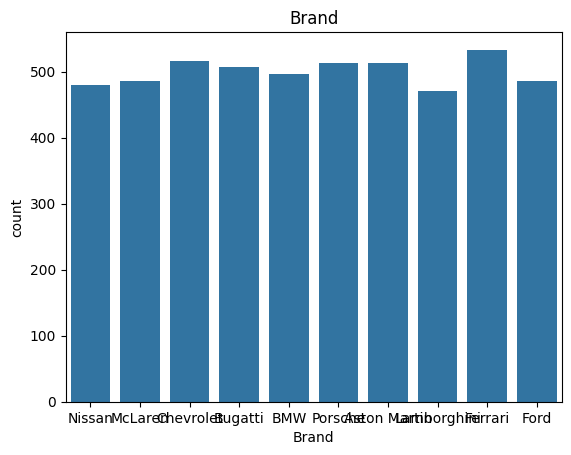

In [64]:
sns.countplot(x="Brand", data=df)
plt.title("Brand")
plt.show()

In [65]:
counts = df["Brand"].value_counts()
percs = df["Brand"].value_counts(normalize=True).mul(100).round(1).astype(str)+"%"
pd.concat([counts,percs],axis=1, keys=["count","percentage"])

,count,percentage
Brand,,
Ferrari,533,10.7%
Chevrolet,516,10.3%
Porsche,513,10.3%
Aston Martin,513,10.3%
Bugatti,507,10.1%
BMW,496,9.9%
McLaren,486,9.7%
Ford,486,9.7%
Nissan,480,9.6%


<Axes: ylabel='Brands'>

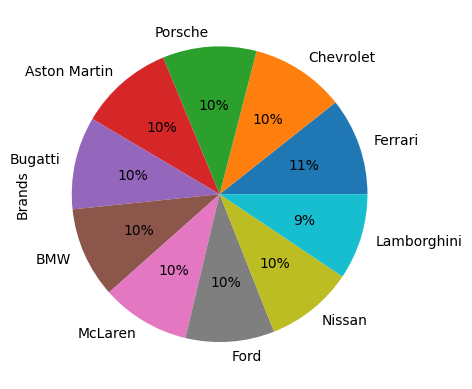

In [66]:
df["Brand"].value_counts().plot(kind="pie",ylabel="Brands",autopct="%1.0f%%")

#### Model Graphic

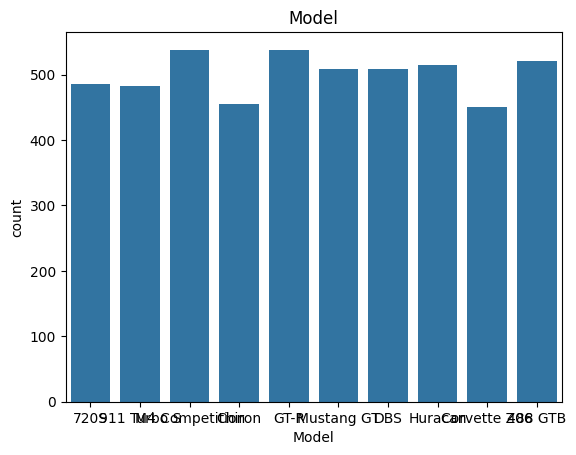

In [67]:
sns.countplot(x="Model", data=df)
plt.title("Model")
plt.show()

In [68]:
df.groupby(["Brand","Model"]).size()

Brand         Model         
Aston Martin  488 GTB           52
              720S              52
              911 Turbo S       58
              Chiron            50
              Corvette Z06      49
              DBS               42
              GT-R              52
              Huracan           55
              M4 Competition    50
              Mustang GT        53
BMW           488 GTB           56
              720S              52
              911 Turbo S       43
              Chiron            44
              Corvette Z06      52
              DBS               49
              GT-R              56
              Huracan           45
              M4 Competition    53
              Mustang GT        46
Bugatti       488 GTB           48
              720S              52
              911 Turbo S       48
              Chiron            53
              Corvette Z06      33
              DBS               63
              GT-R              51
              Huracan     

### REGRESSION

In [69]:
# condition_dict = {"new": 1, "used": 2, "restored": 3, "salvage": 4}
# popularity_dict = {"High": 1, "Medium": 2, "Low": 3}

In [70]:
# df["Year"] = df.apply(lambda row: datetime.now().year - row.Year, axis=1)

In [71]:
# df.apply(lambda row:condition_dict[row.Condition], axis=1 )

In [72]:
df["Modification"] = df.apply(lambda row:1 if len(row.Modification) else 0, axis= 1 )

In [73]:
# df["Popularity"] = df.apply(lambda row: popularity_dict[row.Popularity], axis=1)

In [74]:
X = df[["Year","Brand","Number_of_Owners","Production_Units","Insurance_Cost","Fuel_Efficiency","CO2_Emissions","Engine_Size","Horsepower","Torque","Weight","Top_Speed","Acceleration_0_100","Popularity","Country","Condition","Market_Demand","Fuel_Type","Modification","Transmission","Drivetrain","Model"]]
X = pd.get_dummies(X, dtype=int)
X.head()

,Year,Number_of_Owners,Production_Units,Insurance_Cost,Fuel_Efficiency,CO2_Emissions,Engine_Size,Horsepower,Torque,Weight,Top_Speed,Acceleration_0_100,Modification,Brand_Aston Martin,Brand_BMW,Brand_Bugatti,Brand_Chevrolet,Brand_Ferrari,Brand_Ford,Brand_Lamborghini,Brand_McLaren,Brand_Nissan,Brand_Porsche,Popularity_High,Popularity_Low,Popularity_Medium,Country_Asia,Country_Europe,Country_USA,Condition_new,Condition_restored,Condition_salvage,Condition_used,Market_Demand_High,Market_Demand_Low,Market_Demand_Medium,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_Petrol,Transmission_Automatic,Transmission_CVT,Transmission_DCT,Transmission_Manual,Drivetrain_AWD,Drivetrain_FWD,Drivetrain_RWD,Model_488 GTB,Model_720S,Model_911 Turbo S,Model_Chiron,Model_Corvette Z06,Model_DBS,Model_GT-R,Model_Huracan,Model_M4 Competition,Model_Mustang GT
0,2006,4,5000,13410,10.5,307,3.7,420,705,1785,238,5.7,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
1,2009,2,1000,10795,9.4,113,5.3,1104,766,992,386,4.6,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0
2,2009,2,20000,1716,5.0,321,5.5,153,1573,2022,397,6.7,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
3,1982,4,20000,11618,7.3,343,5.4,544,1009,1091,151,2.7,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
4,2022,2,100000,11324,6.0,246,2.4,980,693,1232,385,3.0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0


In [75]:
Y = df["Price"]

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=101)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4000, 56)
(1000, 56)
(4000,)
(1000,)


In [77]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [78]:
print(model.intercept_)

737938.1267731372


In [79]:
coeff_parameter = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coeff_parameter

,Coefficient
Year,-241.749555
Number_of_Owners,-640.610975
Production_Units,0.016782
Insurance_Cost,0.580604
Fuel_Efficiency,1401.033101
CO2_Emissions,0.220218
Engine_Size,-546.411370
Horsepower,-2.114368
Torque,2.168948
Weight,-4.569045


In [80]:
predictions = model.predict(X_test)
predictions

array([268039.40458739, 250663.68353195, 269768.83544953, 230779.94469613,
       245456.96334706, 267982.79754685, 247678.08963777, 266881.57819235,
       265867.75131372, 236827.80566496, 300740.47451953, 249676.56708338,
       254454.71761542, 281123.01305922, 269071.89230935, 273933.33334088,
       248804.36234133, 253753.66938235, 278743.22141997, 257638.06321911,
       238346.41063325, 259981.75746001, 285434.31034665, 274229.94844293,
       287856.4797911 , 240514.65515598, 264665.44633157, 260157.03340726,
       289168.13678959, 247411.58774275, 271725.95505391, 249850.14882346,
       254289.55188473, 269328.63520722, 269219.32249506, 260883.10242904,
       277440.42010153, 293371.95560187, 273491.41530753, 261597.22389175,
       283459.93689718, 272225.90876073, 259529.30714485, 273632.36048098,
       278419.89636272, 249749.576606  , 246677.36123416, 276629.73169768,
       269190.67861753, 268031.16381798, 281171.49578648, 264419.19542454,
       295225.31253356, 2

<Axes: xlabel='Price'>

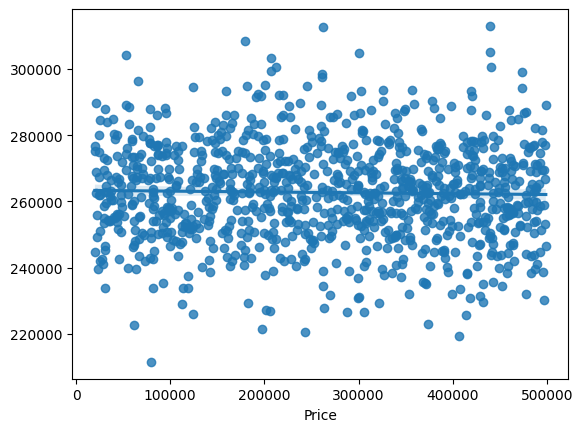

In [81]:
sns.regplot(x=y_test,y=predictions)

In [82]:
X_train_Sm= sm.add_constant(X_train)
X_train_Sm= sm.add_constant(X_train)
ls=sm.OLS(y_train,X_train_Sm).fit()
print(ls.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9936
Date:                Sat, 08 Feb 2025   Prob (F-statistic):              0.485
Time:                        08:45:51   Log-Likelihood:                -52967.
No. Observations:                4000   AIC:                         1.060e+05
Df Residuals:                    3952   BIC:                         1.063e+05
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   2.19